In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instances = pd.read_csv('instance_scores.csv')
Lambda = pd.read_csv('Lambda_wts.csv')
q_set = pd.read_csv('Qset_tats.csv')
test_data = pd.read_csv('test_share.csv')
train_data = pd.read_csv('train.csv')

In [3]:
# just seen the all dataset for overview
print(geo)
print(instances)
print(Lambda)
print(q_set)
print(test_data)
print(train_data)

             id  geo_score
0         26674       4.48
1        204314       4.48
2        176521       5.17
3         48812      -2.41
4        126870       6.55
...         ...        ...
1424030  107880       1.03
1424031  282410       8.62
1424032  209634      -1.72
1424033  211652     -10.00
1424034   73455       5.86

[1424035 rows x 2 columns]
             id  instance_scores
0        173444            -0.88
1        259378             1.50
2        161170             0.44
3        191161             0.76
4         34521            -0.84
...         ...              ...
1424030   80337             0.20
1424031  216371             0.64
1424032   35358             0.77
1424033  159766            10.56
1424034  197580             0.08

[1424035 rows x 2 columns]
        Group  lambda_wt
0      Grp936       3.41
1      Grp347      -2.88
2      Grp188       0.39
3     Grp1053      -2.75
4       Grp56      -0.83
...       ...        ...
1395   Grp892       4.24
1396  Grp1072      -7.28

In [4]:
# check the length of datasets
print(geo.shape)
print()
print(instances.shape)
print()
print(Lambda.shape)
print()
print(q_set.shape)
print()
print(test_data.shape)
print()
print(train_data.shape)

(1424035, 2)

(1424035, 2)

(1400, 2)

(1424035, 2)

(56962, 27)

(227845, 28)


In [5]:
train_data['data'] = 'train'
test_data['data'] = 'test'

In [6]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [7]:
test_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [8]:
geo.head(2)

,id,geo_score
0,26674,4.48
1,204314,4.48


In [9]:
instances.head(2)

,id,instance_scores
0,173444,-0.88
1,259378,1.50


In [10]:
Lambda.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [11]:
q_set.head(2)

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10


In [12]:
test_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [13]:
train_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [14]:
# find the number of columns in each dataset
print(geo.columns)
print()
print(instances.columns)
print()
print(Lambda.columns)
print()
print(q_set.columns)
print()
print(test_data.columns)
print()
print(train_data.columns)

Index(['id', 'geo_score'], dtype='object')

Index(['id', 'instance_scores'], dtype='object')

Index(['Group', 'lambda_wt'], dtype='object')

Index(['id', 'qsets_normalized_tat'], dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')


In [15]:
# find the number of columns in each dataset
print(geo.nunique())
print()
print(instances.nunique())
print()
print(Lambda.nunique())
print()
print(q_set.nunique())
print()
print(test_data.nunique())
print()
print(train_data.nunique())

id           284807
geo_score     25523
dtype: int64

id                 284807
instance_scores     11158
dtype: int64

Group        1400
lambda_wt    1400
dtype: int64

id                      284807
qsets_normalized_tat     24832
dtype: int64

id                56962
Group               915
Per1               1275
Per2               1586
Per3               1095
Per4               1069
Per5               1253
Per6               1092
Per7               1210
Per8               1265
Per9                916
Dem1                699
Dem2                696
Dem3                645
Dem4                716
Dem5                658
Dem6                715
Dem7                956
Dem8                910
Dem9                605
Cred1               809
Cred2               399
Cred3               497
Cred4               388
Cred5               635
Cred6               489
Normalised_FNT    13855
data                  1
dtype: int64

id                227845
Group               1301
Per1              

In [16]:
print(geo.info())
print()
print(instances.info())
print()
print(Lambda.info())
print()
print(q_set.info())
print()
print(test_data.info())
print()
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64
dtypes: float64(1), object(1)
memory

In [17]:
print(geo.duplicated().sum())
print()
print(instances.duplicated().sum())
print()
print(Lambda.duplicated().sum())
print()
print(q_set.duplicated().sum())
print()
print(test_data.duplicated().sum())
print()
print(train_data.duplicated().sum())

55349

33600

0

59311

0

0


In [18]:
test_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [19]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [20]:
df = pd.concat([test_data,train_data],axis = 0)
df

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data,Target
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test,NaN
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test,NaN
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test,NaN
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test,NaN
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,train,0.0
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,train,0.0
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,train,0.0
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,train,0.0


In [21]:
df.shape

(284807, 29)

In [22]:
df.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data,Target
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test,NaN
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test,NaN


In [23]:
df.tail(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data,Target
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.90,0.813333,0.720000,...,0.606667,0.540000,0.643333,0.906667,0.54,0.766667,0.710000,-242.75,train,0.0
227844,22175,Grp143,1.006667,0.553333,0.946667,1.206667,0.406667,0.75,0.520000,0.756667,...,0.646667,0.636667,0.683333,0.843333,0.58,0.683333,0.676667,-235.00,train,0.0


In [24]:
df.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data', 'Target'],
      dtype='object')

In [25]:
print("df id", df['id'].nunique())
print()
print("df group", df['Group'].nunique())

df id 284807

df group 1400


In [26]:
print(geo.isnull().sum())
print()
print(instances.isnull().sum())
print()
print(Lambda.isnull().sum())
print()
print(q_set.isnull().sum())
print()
print(df.isnull().sum())

id               0
geo_score    71543
dtype: int64

id                 0
instance_scores    0
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                           0
qsets_normalized_tat    103201
dtype: int64

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
data                  0
Target            56962
dtype: int64


In [27]:
print(geo.describe())
print()
print(q_set.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [28]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
q_set['qsets_normalized_tat'] = q_set['qsets_normalized_tat'].fillna(q_set['qsets_normalized_tat'].median())

In [29]:
geo.shape

(1424035, 2)

In [30]:
geo['id'].nunique()

284807

In [31]:
geo = geo.groupby('id').mean()

In [32]:
geo.shape

(284807, 1)

In [33]:
geo

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540
...,...
284802,2.710
284803,0.956
284804,0.060


In [34]:
q_set = q_set.groupby('id').mean()

In [35]:
q_set.shape

(284807, 1)

In [36]:
instances.shape

(1424035, 2)

In [37]:
instances = instances.groupby('id').mean()

In [38]:
instances.shape

(284807, 1)

In [39]:
Lambda.shape

(1400, 2)

In [40]:
print(geo.shape)
print()
print(instances.shape)
print()
print(Lambda.shape)
print()
print(q_set.shape)
print()
print(df.shape)

(284807, 1)

(284807, 1)

(1400, 2)

(284807, 1)

(284807, 29)


In [41]:
df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data,Target
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test,NaN
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test,NaN
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test,NaN
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test,NaN
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test,NaN


In [42]:
df = pd.merge(df, geo, on='id', how='left')

In [43]:
df.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data,Target,geo_score
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test,NaN,0.25
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test,NaN,0.43


In [44]:
instances.head()

,instance_scores
id,
0,0.09
1,-0.17
2,0.21
3,-0.05
4,0.75


In [45]:
df = pd.merge(df,instances , on='id', how='left')

In [46]:
q_set.head(2)

,qsets_normalized_tat
id,
0,0.214
1,-0.110


In [47]:
df.head(1)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data,Target,geo_score,instance_scores
0,146574,Grp229,-0.3,1.54,0.22,-0.28,0.57,0.26,0.7,1.076667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.75,test,NaN,0.25,-0.04


In [48]:
df.shape

(284807, 31)

In [49]:
df['Group'].nunique()

1400

In [50]:
df = pd.merge(df,q_set , on='id', how='left')

In [51]:
Lambda.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [52]:
Lambda.shape

(1400, 2)

In [53]:
Lambda['Group'].nunique()

1400

In [54]:
df = pd.merge(df,Lambda , on='Group', how='left')

In [55]:
df.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,data,Target,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.796667,0.823333,0.783333,-249.7500,test,NaN,0.25,-0.04,-0.426,0.76
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.630000,0.673333,0.673333,-249.8125,test,NaN,0.43,-0.77,-0.620,0.18
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.596667,0.680000,0.670000,-248.1200,test,NaN,1.32,0.11,-0.406,0.39
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.320000,0.676667,0.660000,-222.9875,test,NaN,-2.11,0.33,0.374,1.80
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.546667,0.650000,0.663333,-196.2200,test,NaN,-2.11,-0.37,-0.130,1.89


In [56]:
df['lambda_wt'].count()

284807

In [57]:
df['lambda_wt'].nunique()

1400

In [58]:
train_data = df[df['data']=='train']
test_data = df[df['data']=='test']

In [59]:
train_data.shape

(227845, 33)

In [60]:
test_data.shape

(56962, 33)

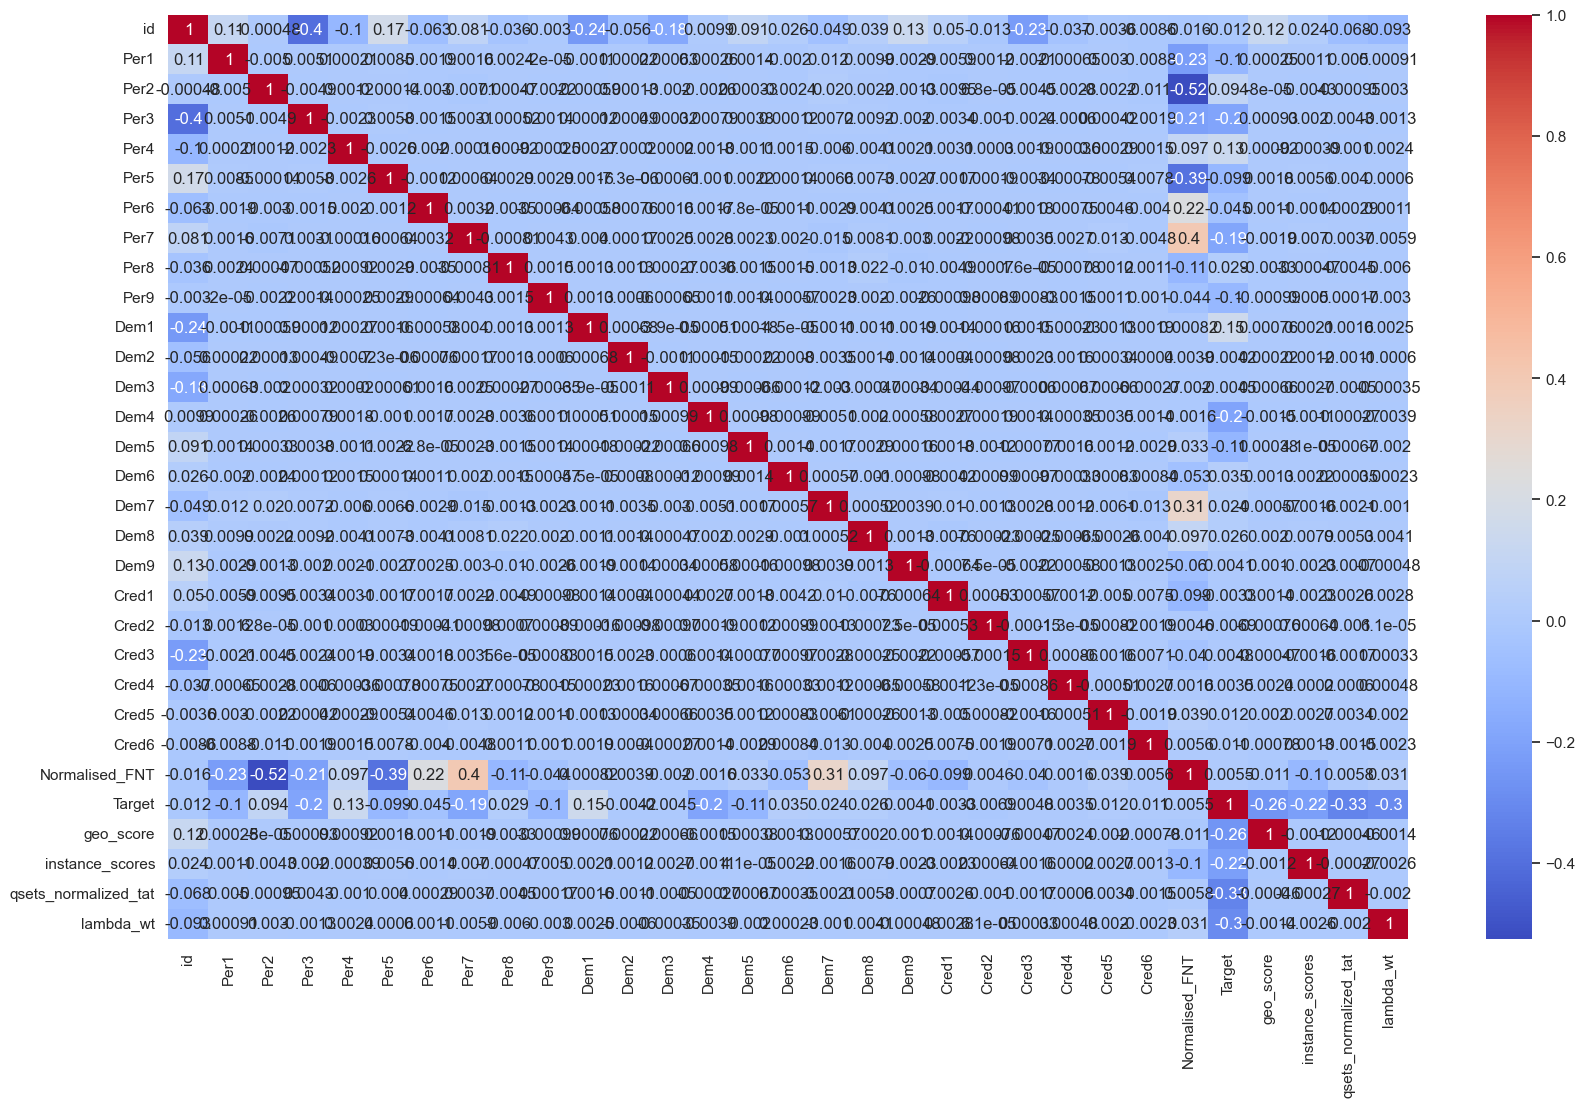

In [61]:
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [62]:
# splitting the data into independent and dependent variable
x = train_data.drop(['id', 'Group','Target', 'data'], axis=1) # ind variable
y = train_data['Target'] # dependent

In [63]:
x.head(2)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
56962,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,0.863333,0.46,...,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.256,-0.06,-0.70,-0.13
56963,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,0.190000,0.47,...,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,-0.250,0.52,0.14,0.66


In [64]:
x.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [65]:
y.head()

56962    0.0
56963    0.0
56964    0.0
56965    0.0
56966    0.0
Name: Target, dtype: float64

In [66]:
test_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data', 'Target', 'geo_score', 'instance_scores',
       'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [67]:
test_data.isnull().sum()/len(test_data)*100

id                        0.0
Group                     0.0
Per1                      0.0
Per2                      0.0
Per3                      0.0
Per4                      0.0
Per5                      0.0
Per6                      0.0
Per7                      0.0
Per8                      0.0
Per9                      0.0
Dem1                      0.0
Dem2                      0.0
Dem3                      0.0
Dem4                      0.0
Dem5                      0.0
Dem6                      0.0
Dem7                      0.0
Dem8                      0.0
Dem9                      0.0
Cred1                     0.0
Cred2                     0.0
Cred3                     0.0
Cred4                     0.0
Cred5                     0.0
Cred6                     0.0
Normalised_FNT            0.0
data                      0.0
Target                  100.0
geo_score                 0.0
instance_scores           0.0
qsets_normalized_tat      0.0
lambda_wt                 0.0
dtype: flo

In [68]:
test_data = test_data.drop(['id','Group','Target','data'], axis=1)

In [69]:
# Task : 
# This data is for prediction whether listed customer will do fraudulent or not
test_data.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
1,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
2,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
3,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
4,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


# **** Actual Data ***

In [70]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
56962,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
56963,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
56964,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
56965,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
56966,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [71]:
x.isnull().any()

Per1                    False
Per2                    False
Per3                    False
Per4                    False
Per5                    False
Per6                    False
Per7                    False
Per8                    False
Per9                    False
Dem1                    False
Dem2                    False
Dem3                    False
Dem4                    False
Dem5                    False
Dem6                    False
Dem7                    False
Dem8                    False
Dem9                    False
Cred1                   False
Cred2                   False
Cred3                   False
Cred4                   False
Cred5                   False
Cred6                   False
Normalised_FNT          False
geo_score               False
instance_scores         False
qsets_normalized_tat    False
lambda_wt               False
dtype: bool

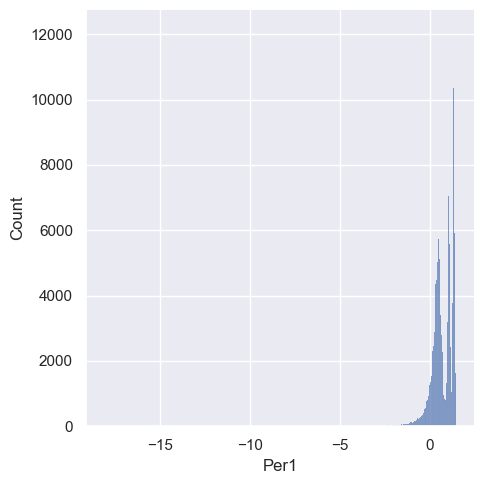

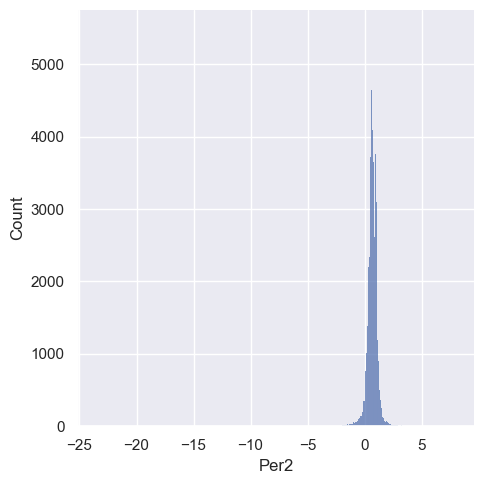

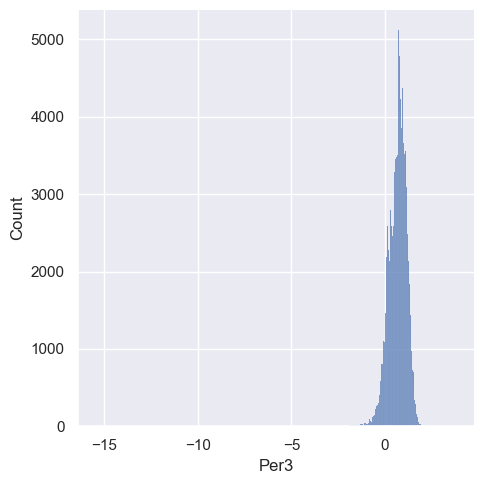

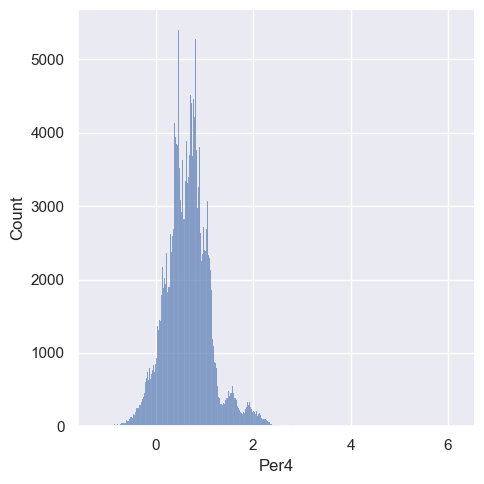

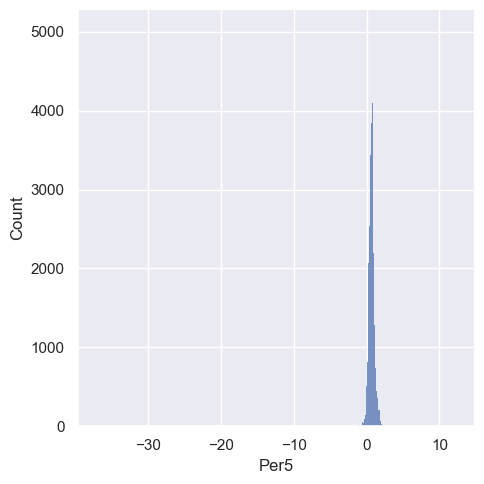

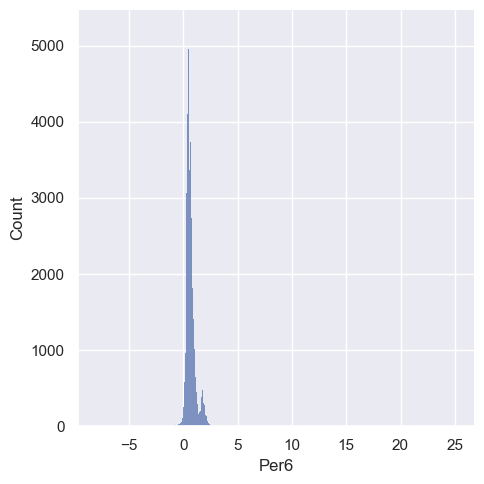

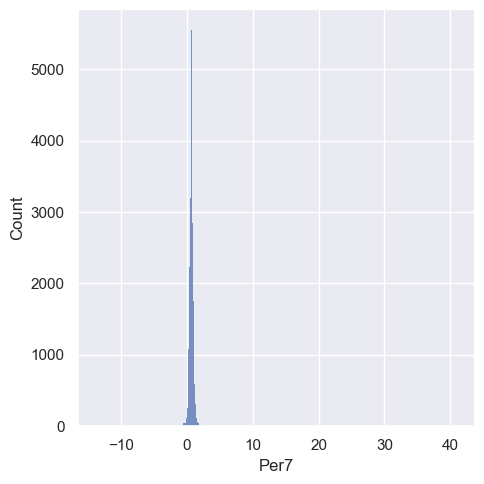

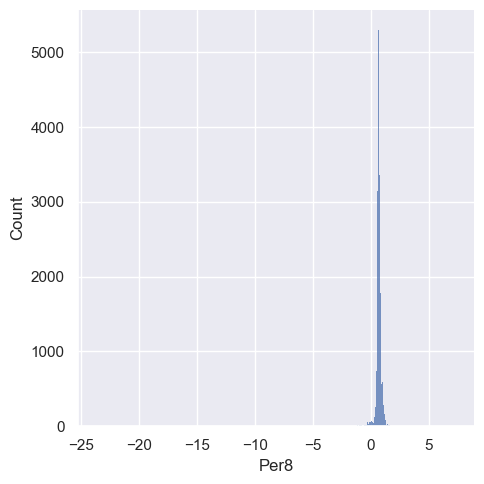

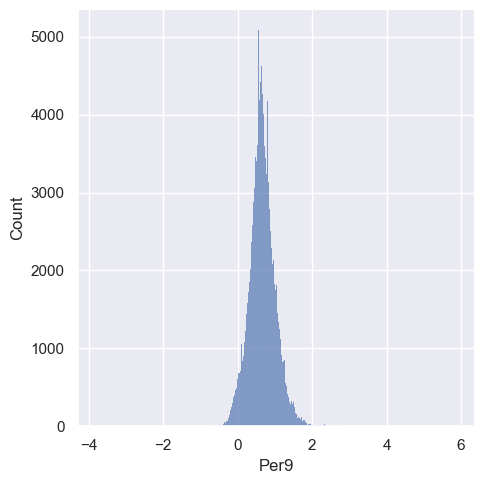

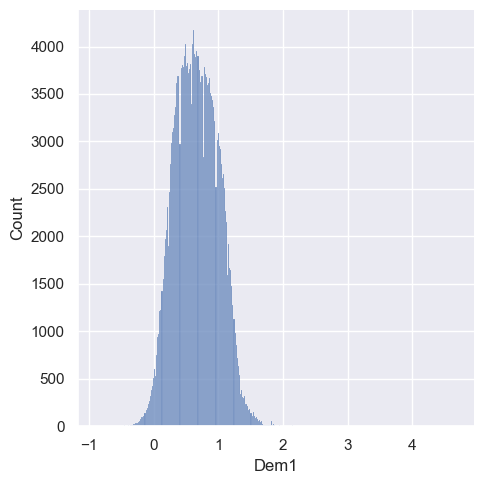

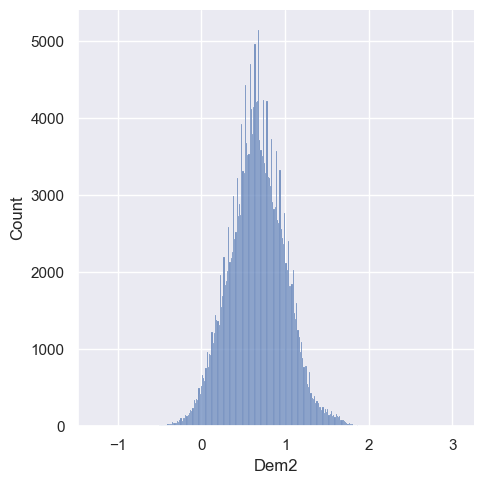

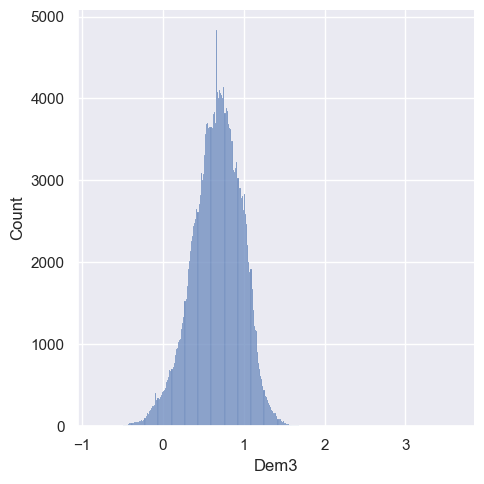

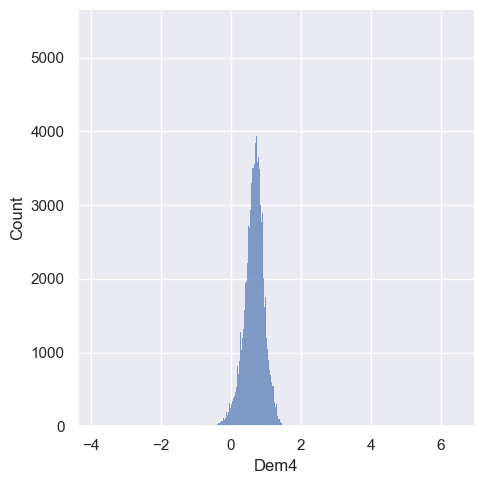

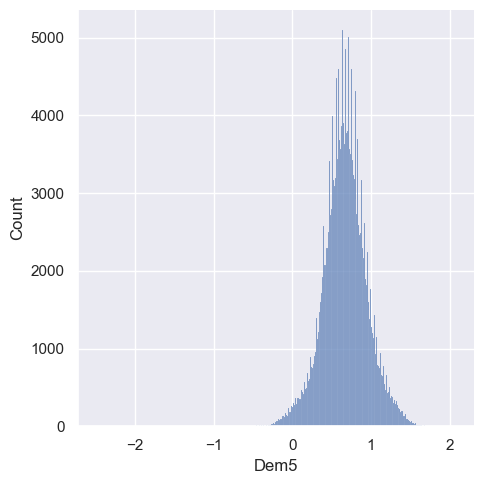

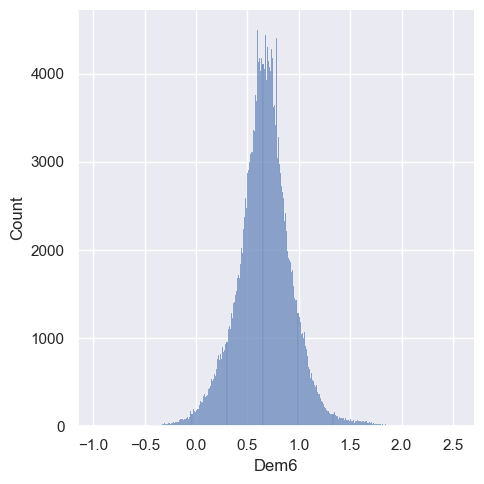

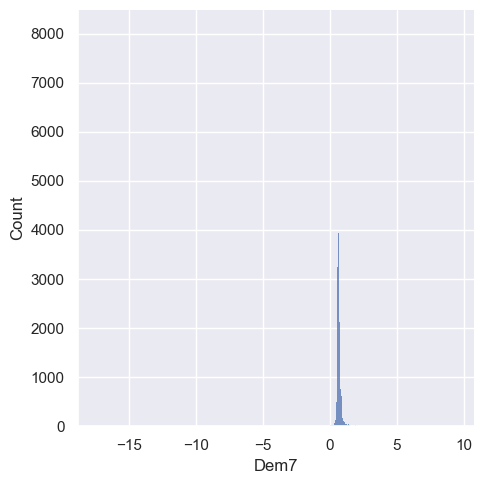

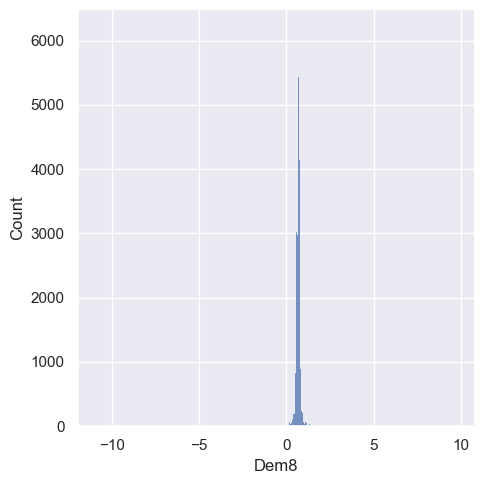

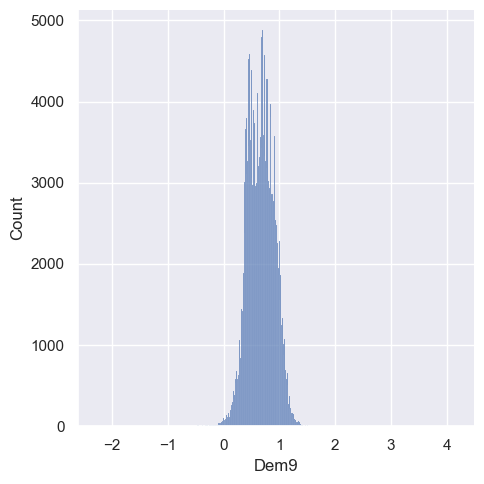

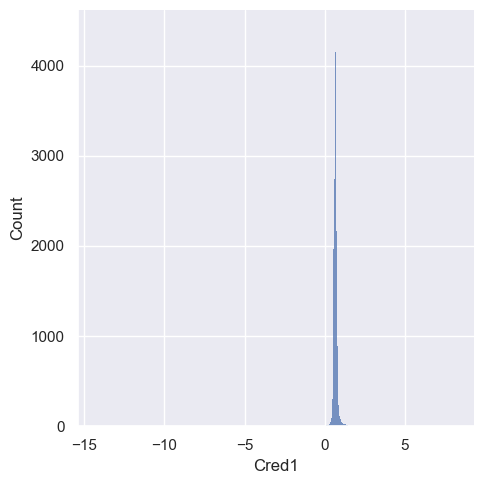

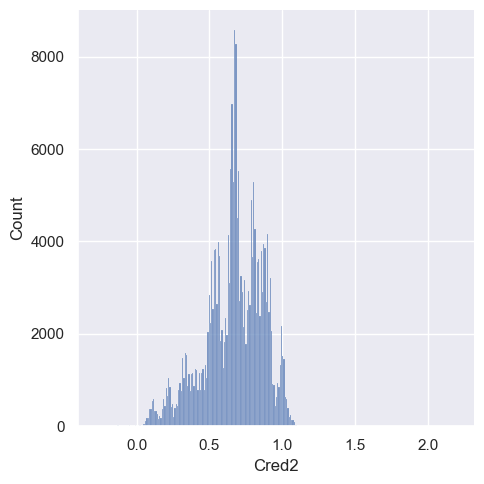

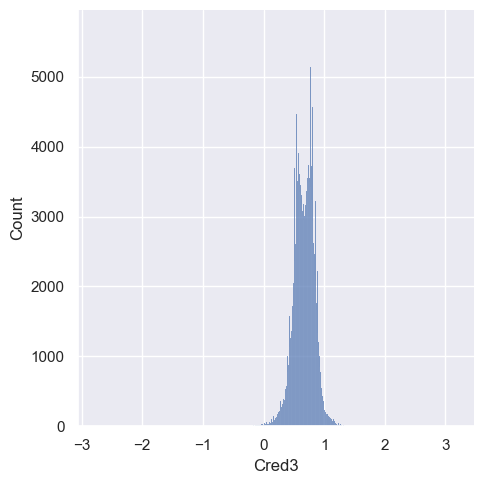

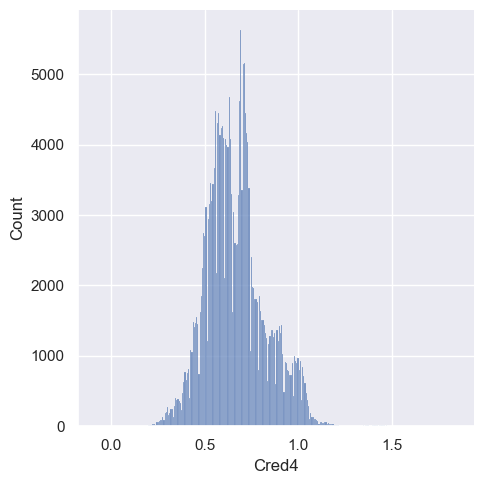

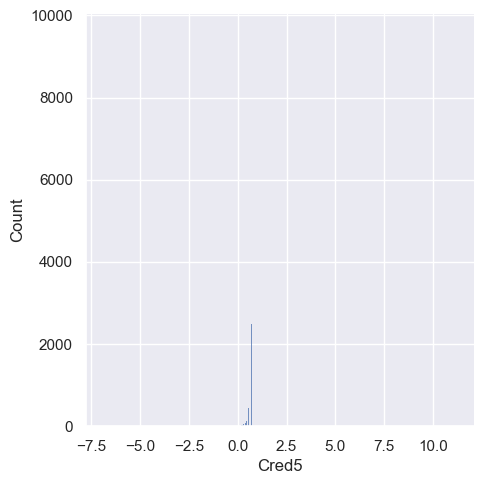

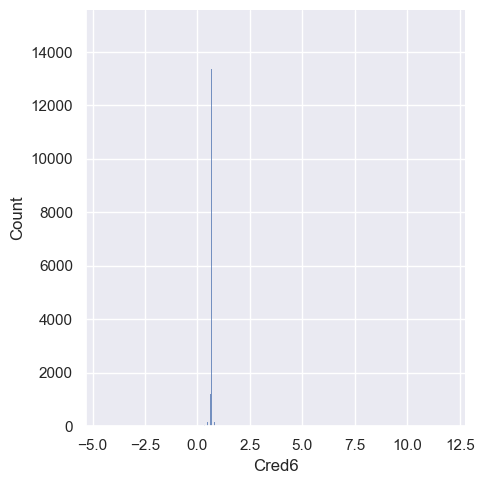

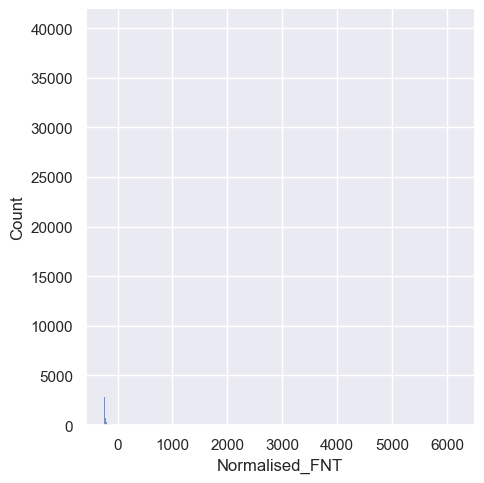

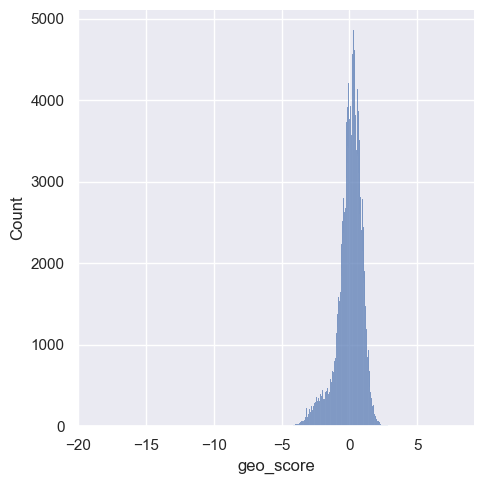

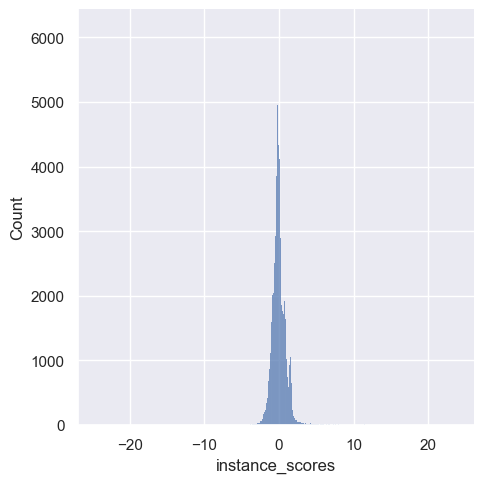

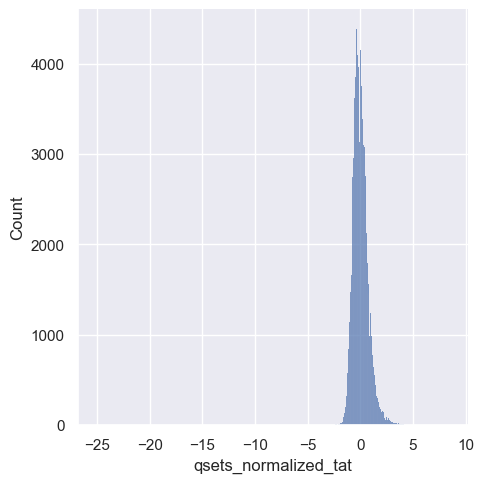

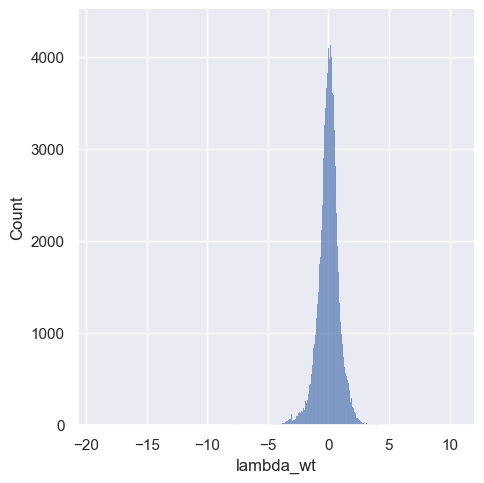

In [72]:
def distplots(col):
    sns.displot(x[col])
    plt.show()
    
for i in list(x.columns)[0:]:
    distplots(i)

In [74]:
x.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.001346,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.850169,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,-0.066000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [75]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)

In [76]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(182276, 29) (45569, 29) (182276,) (45569,)


In [77]:
y_train.value_counts()

0.0    181961
1.0       315
Name: Target, dtype: int64

In [78]:
y_test.value_counts()

0.0    45490
1.0       79
Name: Target, dtype: int64

In [79]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression

In [80]:
logit = LogisticRegression()
lr = logit.fit(x_train, y_train)
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

[[181938     23]
 [   119    196]]

[[45484     6]
 [   31    48]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.89      0.62      0.73       315

    accuracy                           1.00    182276
   macro avg       0.95      0.81      0.87    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.89      0.61      0.72        79

    accuracy                           1.00     45569
   macro avg       0.94      0.80      0.86     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9992209616186443

Test Accuracy 0.999188044503939


In [81]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dt = dtree.fit(x_train, y_train)
y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_dt))
print()
print(confusion_matrix(y_test, y_pred_test_dt))
print()
# classification_report
print(classification_report(y_train, y_pred_train_dt))
print()
print(classification_report(y_test, y_pred_test_dt))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_dt))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_dt))

[[181961      0]
 [     0    315]]

[[45469    21]
 [   24    55]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.72      0.70      0.71        79

    accuracy                           1.00     45569
   macro avg       0.86      0.85      0.85     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 1.0

Test Accuracy 0.9990124865588448


In [83]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rf = rforest.fit(x_train, y_train)
y_pred_train_rf = rforest.predict(x_train)
y_pred_test_rf = rforest.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_test, y_pred_test_rf))
print()
# classification_report
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_rf))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_rf))

[[181961      0]
 [     1    314]]

[[45487     3]
 [   23    56]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.71      0.81        79

    accuracy                           1.00     45569
   macro avg       0.97      0.85      0.91     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9999945138142158

Test Accuracy 0.9994294366784436


In [85]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgb = xgboost.fit(x_train, y_train)
y_pred_train_xgb = xgboost.predict(x_train)
y_pred_test_xgb = xgboost.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_xgb))
print()
print(confusion_matrix(y_test, y_pred_test_xgb))
print()
# classification_report
print(classification_report(y_train, y_pred_train_xgb))
print()
print(classification_report(y_test, y_pred_test_xgb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_xgb))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_xgb))

ModuleNotFoundError: No module named 'xgboost'

In [86]:
from sklearn.svm import SVC
SVClass = SVC()
svm = SVClass.fit(x_train, y_train)
y_pred_train_svm = SVClass.predict(x_train)
y_pred_test_svm = SVClass.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_svm))
print()
print(confusion_matrix(y_test, y_pred_test_svm))
print()
# classification_report
print(classification_report(y_train, y_pred_train_svm))
print()
print(classification_report(y_test, y_pred_test_svm))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_svm))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_svm))

[[181936     25]
 [   207    108]]

[[45484     6]
 [   57    22]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.81      0.34      0.48       315

    accuracy                           1.00    182276
   macro avg       0.91      0.67      0.74    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.79      0.28      0.41        79

    accuracy                           1.00     45569
   macro avg       0.89      0.64      0.71     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9987272048980667

Test Accuracy 0.9986174811823828


In [87]:
from sklearn.naive_bayes import BernoulliNB
bernb = BernoulliNB()
bnb = bernb.fit(x_train, y_train)
y_pred_train_bnb = bernb.predict(x_train)
y_pred_test_bnb = bernb.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_bnb))
print()
print(confusion_matrix(y_test, y_pred_test_bnb))
print()
# classification_report
print(classification_report(y_train, y_pred_train_bnb))
print()
print(classification_report(y_test, y_pred_test_bnb))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_bnb))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_bnb))

[[181595    366]
 [    95    220]]

[[45387   103]
 [   29    50]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.38      0.70      0.49       315

    accuracy                           1.00    182276
   macro avg       0.69      0.85      0.74    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.33      0.63      0.43        79

    accuracy                           1.00     45569
   macro avg       0.66      0.82      0.71     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.997470868353486

Test Accuracy 0.9971032939059449


In [88]:
from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('logit', lr ),('dtree', dt),('rforest', rf),
                                     ("svm", svm),("bnb",bnb)])
voting_evc = voting.fit(x_train, y_train)
y_pred_train_voting = voting.predict(x_train)
y_pred_test_voting = voting.predict(x_test)
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train_voting))
print()
print(confusion_matrix(y_test, y_pred_test_voting))
print()
# classification_report
print(classification_report(y_train, y_pred_train_voting))
print()
print(classification_report(y_test, y_pred_test_voting))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train_voting))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test_voting))

[[181940     21]
 [    77    238]]

[[45483     7]
 [   26    53]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       0.92      0.76      0.83       315

    accuracy                           1.00    182276
   macro avg       0.96      0.88      0.91    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.88      0.67      0.76        79

    accuracy                           1.00     45569
   macro avg       0.94      0.84      0.88     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9994623537931488

Test Accuracy 0.9992758234764862


In [91]:
accuracy_logit = accuracy_score(y_test, y_pred_test)
accuracy_dtree = accuracy_score(y_test, y_pred_test_dt)
accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
accuracy_bnb = accuracy_score(y_test, y_pred_test_bnb)
accuracy_voting = accuracy_score(y_test, y_pred_test_voting)

In [92]:
point1 = ["Logistic", 'Dtree','RForest','SVM','BNB','Voting']
point2 = [accuracy_logit,accuracy_dtree,accuracy_rf,accuracy_svm,accuracy_bnb,accuracy_voting]

In [93]:
final_output = pd.DataFrame({"Method Used": point1, "Accuracy":point2})
print(final_output)

  Method Used  Accuracy
0    Logistic  0.999188
1       Dtree  0.999012
2     RForest  0.999429
3         SVM  0.998617
4         BNB  0.997103
5      Voting  0.999276


Axes(0.125,0.11;0.775x0.77)


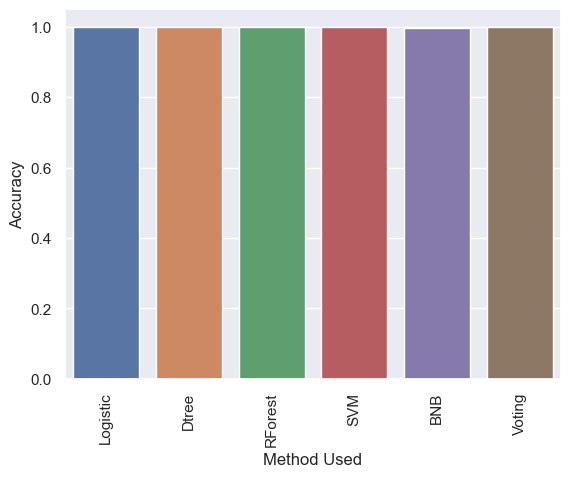

In [94]:
chart = sns.barplot(x="Method Used", y="Accuracy", data=final_output)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [96]:
estimators = [('rf', RandomForestClassifier()),
             ('gdbt',GradientBoostingClassifier()),
             ('nbt',BernoulliNB())]

In [97]:
from sklearn.ensemble import StackingClassifier

In [98]:
classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(),
                               cv=3)

In [100]:
classifier.fit(x_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('rf', RandomForestClassifier()),
                               ('gdbt', GradientBoostingClassifier()),
                               ('nbt', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [101]:
y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [102]:
# Confusion Matrix
print(confusion_matrix(y_train, y_pred_train))
print()
print(confusion_matrix(y_test, y_pred_test))
print()
# classification_report
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))
print()
# accuracy_score
print("Train Accuracy", accuracy_score(y_train, y_pred_train))
print()
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

[[181961      0]
 [    56    259]]

[[45487     3]
 [   29    50]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      0.82      0.90       315

    accuracy                           1.00    182276
   macro avg       1.00      0.91      0.95    182276
weighted avg       1.00      1.00      1.00    182276


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.94      0.63      0.76        79

    accuracy                           1.00     45569
   macro avg       0.97      0.82      0.88     45569
weighted avg       1.00      1.00      1.00     45569


Train Accuracy 0.9996927735960851

Test Accuracy 0.999297768219623


In [103]:
from sklearn.ensemble import IsolationForest

In [104]:
isolation = IsolationForest(contamination=outlier_fraction)
isolation.fit(x_train, y_train)

NameError: name 'outlier_fraction' is not defined